# Pokémon EDA

## Información general

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [8]:
file_path = '../data/raw/pokemon_full_stats.csv'
df = pd.read_csv(file_path)

df.head()

,id,name,type1,type2,hp,attack,defense,speed,height,weight,abilities,generation,catch_rate,category
0,1,bulbasaur,grass,poison,45,49,49,45,7,69,"['overgrow', 'chlorophyll']",generation-i,45,Seed Pokémon
1,2,ivysaur,grass,poison,60,62,63,60,10,130,"['overgrow', 'chlorophyll']",generation-i,45,Seed Pokémon
2,3,venusaur,grass,poison,80,82,83,80,20,1000,"['overgrow', 'chlorophyll']",generation-i,45,Seed Pokémon
3,4,charmander,fire,NaN,39,52,43,65,6,85,"['blaze', 'solar-power']",generation-i,45,Lizard Pokémon
4,5,charmeleon,fire,NaN,58,64,58,80,11,190,"['blaze', 'solar-power']",generation-i,45,Flame Pokémon


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1025 non-null   int64 
 1   name        1025 non-null   object
 2   type1       1025 non-null   object
 3   type2       526 non-null    object
 4   hp          1025 non-null   int64 
 5   attack      1025 non-null   int64 
 6   defense     1025 non-null   int64 
 7   speed       1025 non-null   int64 
 8   height      1025 non-null   int64 
 9   weight      1025 non-null   int64 
 10  abilities   1025 non-null   object
 11  generation  1025 non-null   object
 12  catch_rate  1025 non-null   int64 
 13  category    1025 non-null   object
dtypes: int64(8), object(6)
memory usage: 112.2+ KB


In [4]:
df.describe()

,id,hp,attack,defense,speed,height,weight,catch_rate
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,513.000000,70.184390,77.521951,72.507317,67.186341,12.116098,669.865366,95.454634
std,296.036315,26.631054,29.782541,29.286972,28.717227,12.481673,1212.731138,75.991841
min,1.000000,1.000000,5.000000,5.000000,5.000000,1.000000,1.000000,3.000000
25%,257.000000,50.000000,55.000000,50.000000,45.000000,5.000000,85.000000,45.000000
50%,513.000000,68.000000,75.000000,70.000000,65.000000,10.000000,280.000000,60.000000
75%,769.000000,85.000000,100.000000,90.000000,88.000000,15.000000,700.000000,140.000000
max,1025.000000,255.000000,181.000000,230.000000,200.000000,200.000000,9999.000000,255.000000


In [6]:
df.describe(include='object')

,name,type1,type2,abilities,generation,category
count,1025,1025,526,1025,1025,1025
unique,1025,18,18,622,9,715
top,bulbasaur,water,flying,['levitate'],generation-v,Paradox Pokémon
freq,1,134,100,27,156,22


In [16]:
gens = {
    'generation-i': 'Kanto', 
    'generation-ii': 'Johto', 
    'generation-iii': 'Hoenn', 
    'generation-iv': 'Sinnoh', 
    'generation-v': 'Teselia', 
    'generation-vi': 'Kalos', 
    'generation-vii': 'Alola',
    'generation-viii': 'Galar', 
    'generation-ix': 'Paldea'
}

df['generation'] = df.generation.apply(lambda x: gens[x])

In [17]:
df

,id,name,type1,type2,hp,attack,defense,speed,height,weight,abilities,generation,catch_rate,category
0,1,bulbasaur,grass,poison,45,49,49,45,7,69,"['overgrow', 'chlorophyll']",Kanto,45,Seed Pokémon
1,2,ivysaur,grass,poison,60,62,63,60,10,130,"['overgrow', 'chlorophyll']",Kanto,45,Seed Pokémon
2,3,venusaur,grass,poison,80,82,83,80,20,1000,"['overgrow', 'chlorophyll']",Kanto,45,Seed Pokémon
3,4,charmander,fire,NaN,39,52,43,65,6,85,"['blaze', 'solar-power']",Kanto,45,Lizard Pokémon
4,5,charmeleon,fire,NaN,58,64,58,80,11,190,"['blaze', 'solar-power']",Kanto,45,Flame Pokémon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,raging-bolt,electric,dragon,125,73,91,75,52,4800,['protosynthesis'],Paldea,10,Paradox Pokémon
1021,1022,iron-boulder,rock,psychic,90,120,80,124,15,1625,['quark-drive'],Paldea,10,Paradox Pokémon
1022,1023,iron-crown,steel,psychic,90,72,100,98,16,1560,['quark-drive'],Paldea,10,Paradox Pokémon
1023,1024,terapagos,normal,NaN,90,65,85,60,2,65,['tera-shift'],Paldea,255,Tera Pokémon


## Análisis univariado 📊

### Distribución de Estadísticas Base (HP, Ataque, etc.)

In [10]:
# --- Configuración de Estilo para los Gráficos ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

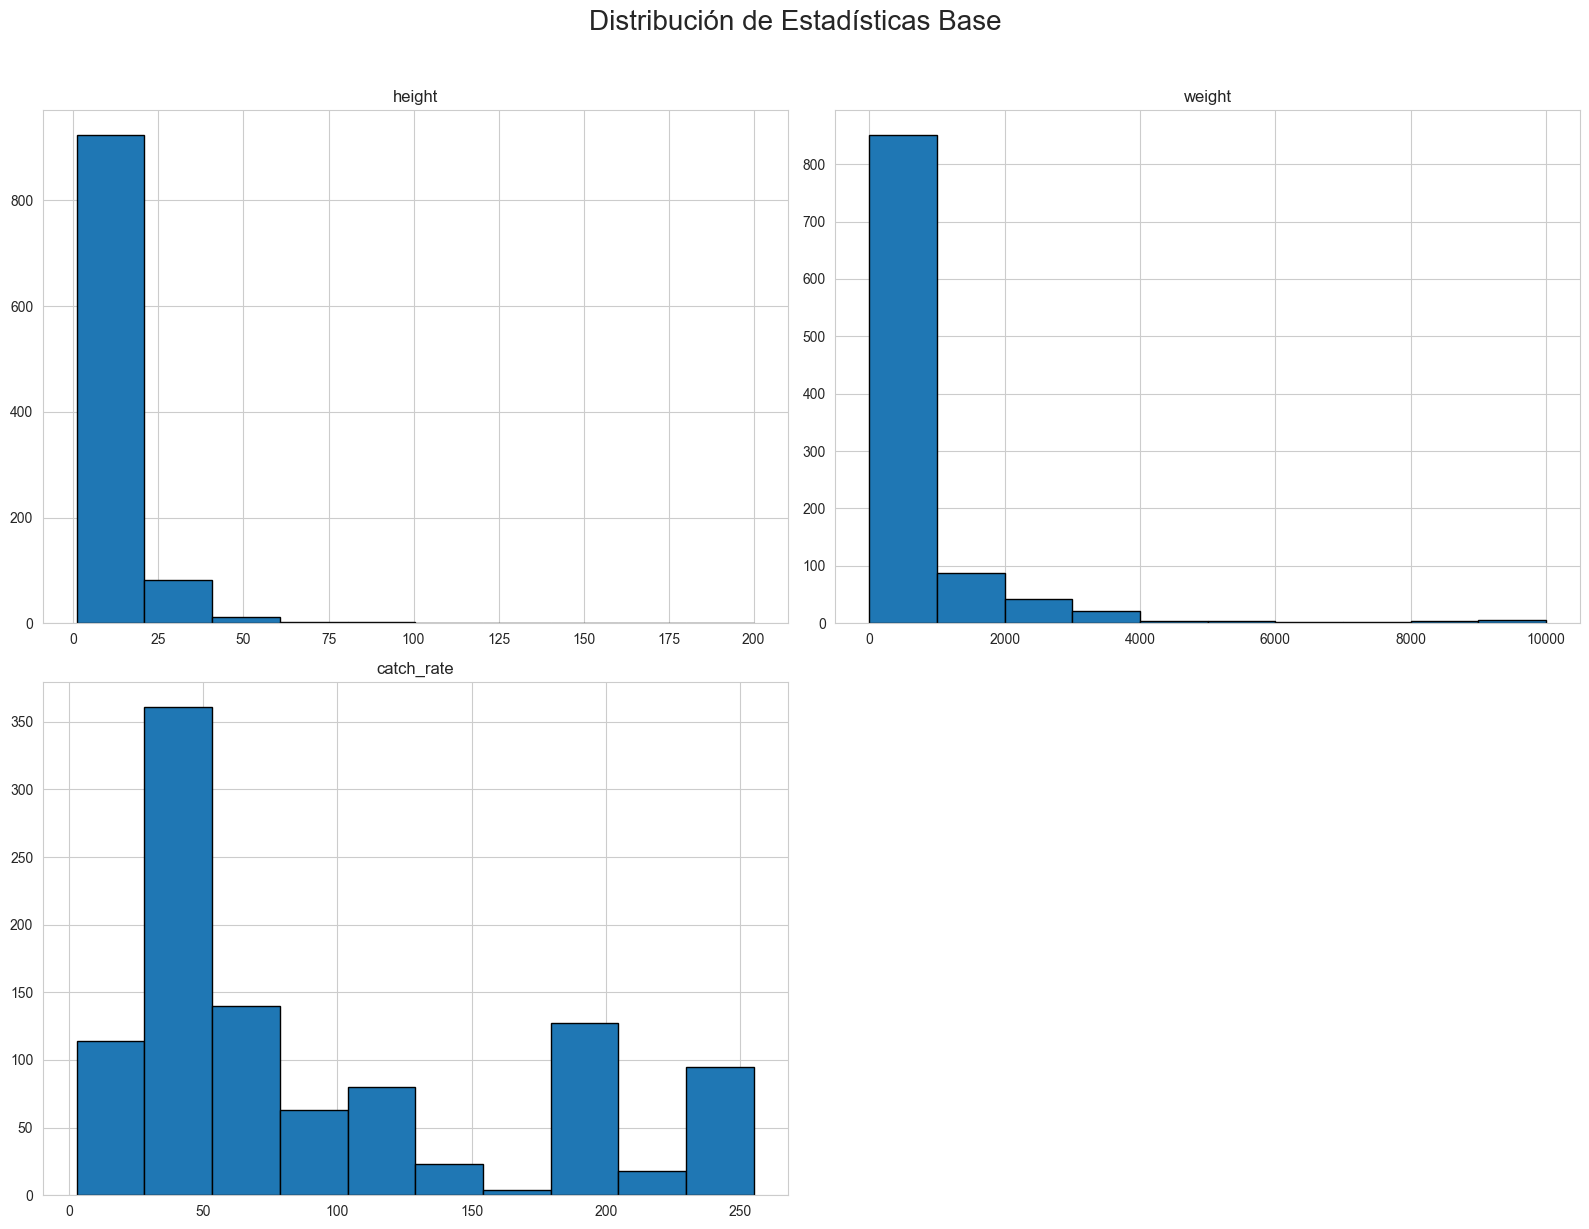

In [14]:
# --- Histogramas para Estadísticas Base ---
stats_cols = ['height', 'weight', 'catch_rate']
df[stats_cols].hist(bins=10, edgecolor='black')

plt.suptitle('Distribución de Estadísticas Base', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

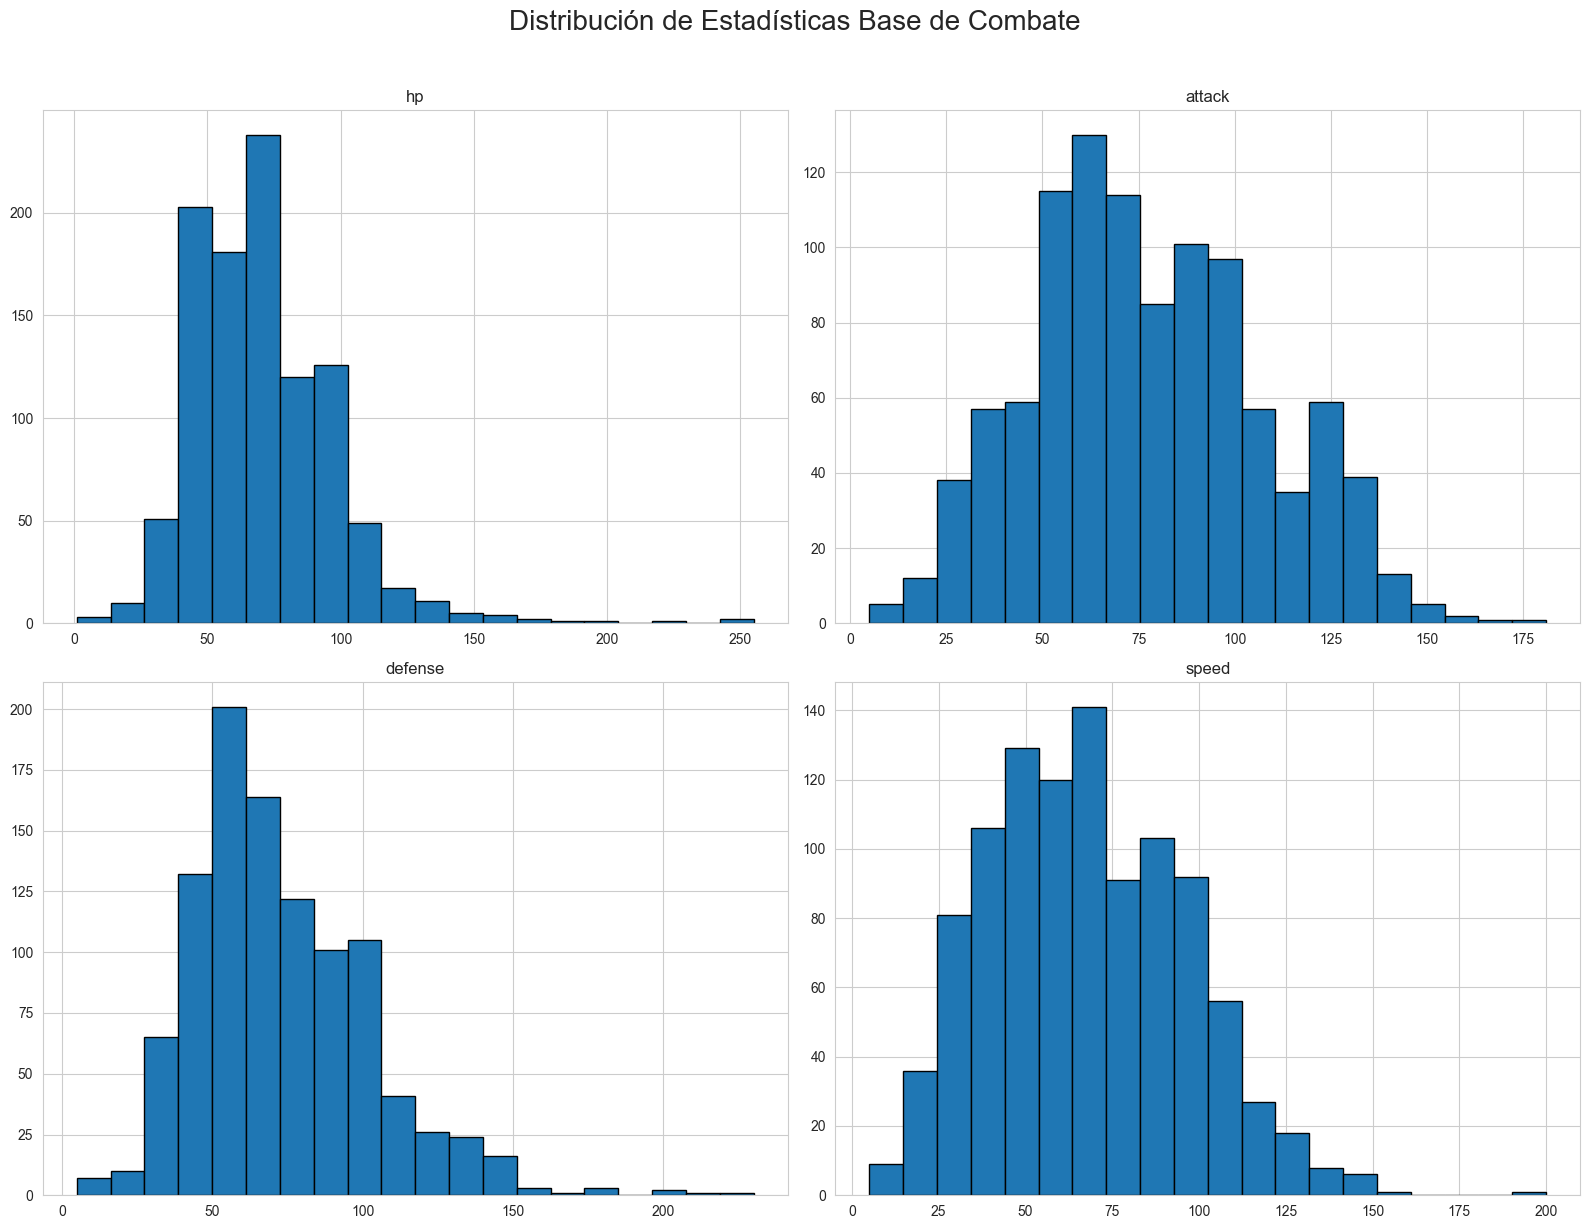

In [ ]:
# --- Histogramas para Estadísticas Base de Combate---
stats_cols = ['hp', 'attack', 'defense', 'speed']
df[stats_cols].hist(bins=20, edgecolor='black')

plt.suptitle('Distribución de Estadísticas Base de Combate', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

### Conteo de Pokémon por Generación

/var/folders/m1/0y71t71124d1b252nm7stg280000gn/T/ipykernel_77308/1278059361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['generation'], order = df['generation'].value_counts().index, palette='viridis')


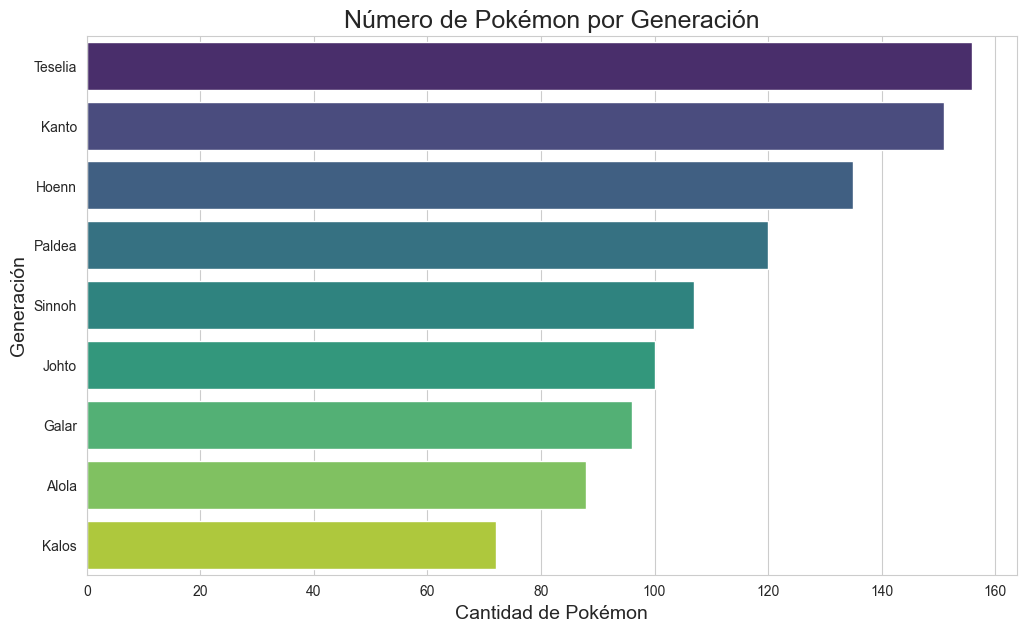

In [18]:
# --- Gráfico de Barras para Generaciones ---
plt.figure(figsize=(12, 7))
sns.countplot(y=df['generation'], order = df['generation'].value_counts().index, palette='viridis')

plt.title('Número de Pokémon por Generación', fontsize=18)
plt.xlabel('Cantidad de Pokémon', fontsize=14)
plt.ylabel('Generación', fontsize=14)
plt.show()

### Frecuencia de Tipos Primarios

/var/folders/m1/0y71t71124d1b252nm7stg280000gn/T/ipykernel_77308/3197878347.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['type1'], order = df['type1'].value_counts().index, palette='plasma')


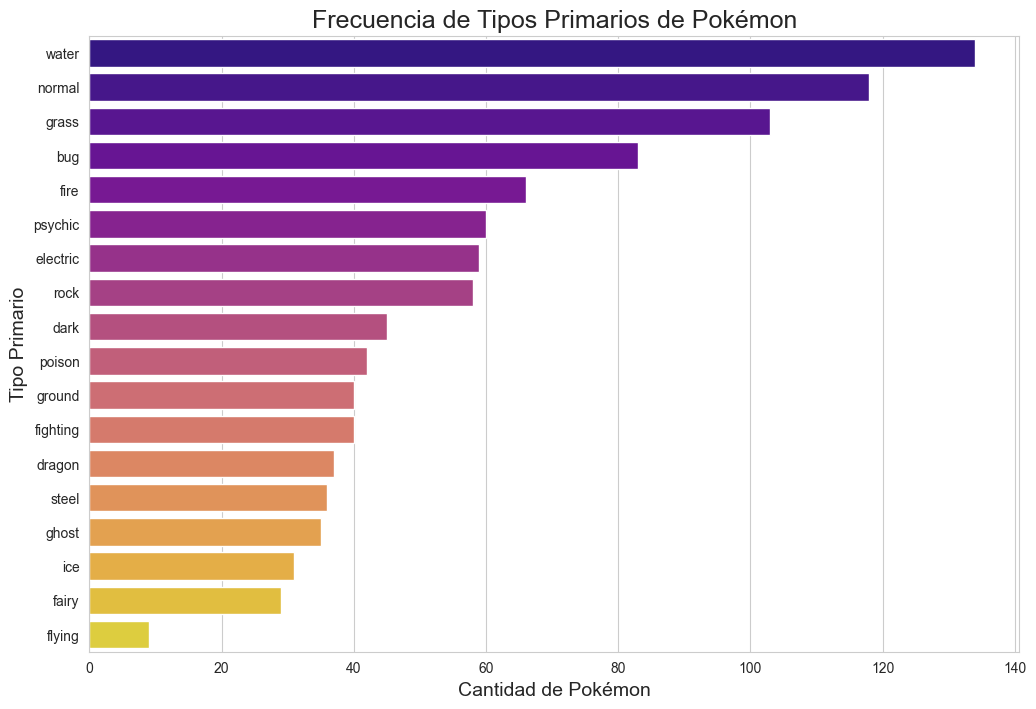

In [19]:
# --- Gráfico de Barras para Tipos Primarios ---
plt.figure(figsize=(12, 8))
sns.countplot(y=df['type1'], order = df['type1'].value_counts().index, palette='plasma')

plt.title('Frecuencia de Tipos Primarios de Pokémon', fontsize=18)
plt.xlabel('Cantidad de Pokémon', fontsize=14)
plt.ylabel('Tipo Primario', fontsize=14)
plt.show()

/var/folders/m1/0y71t71124d1b252nm7stg280000gn/T/ipykernel_77308/782331915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['type2'], order = df['type2'].value_counts().index, palette='plasma')


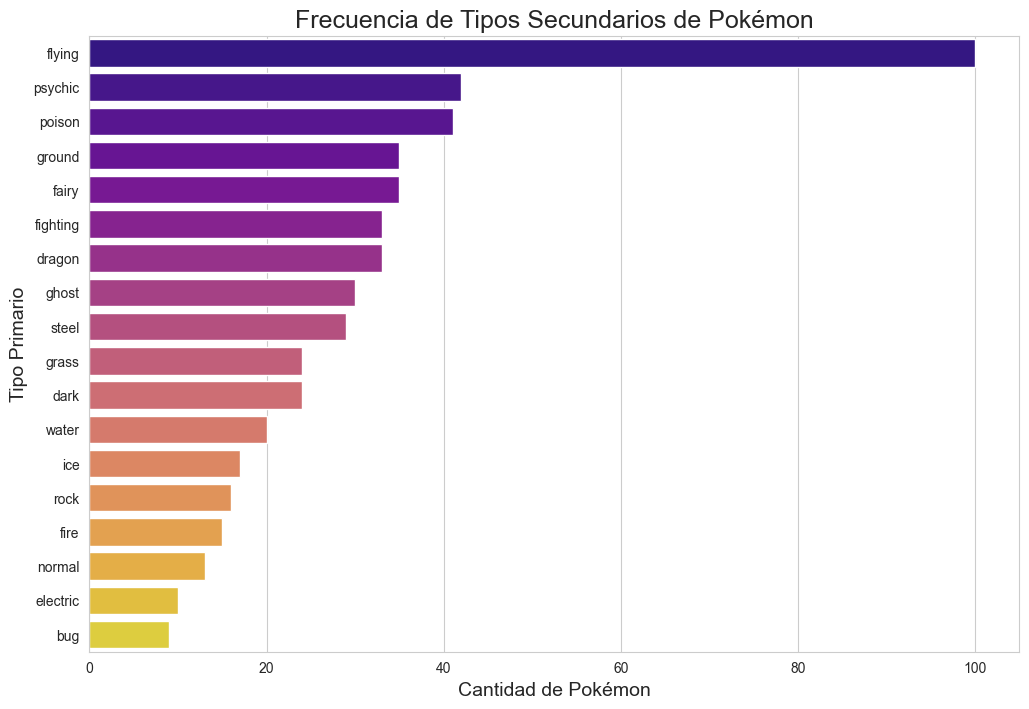

In [20]:
# --- Gráfico de Barras para Tipos Primarios ---
plt.figure(figsize=(12, 8))
sns.countplot(y=df['type2'], order = df['type2'].value_counts().index, palette='plasma')

plt.title('Frecuencia de Tipos Secundarios de Pokémon', fontsize=18)
plt.xlabel('Cantidad de Pokémon', fontsize=14)
plt.ylabel('Tipo Primario', fontsize=14)
plt.show()

/var/folders/m1/0y71t71124d1b252nm7stg280000gn/T/ipykernel_77308/3897038515.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hp', y='name', data=top_10_hp, palette='Greens_r')


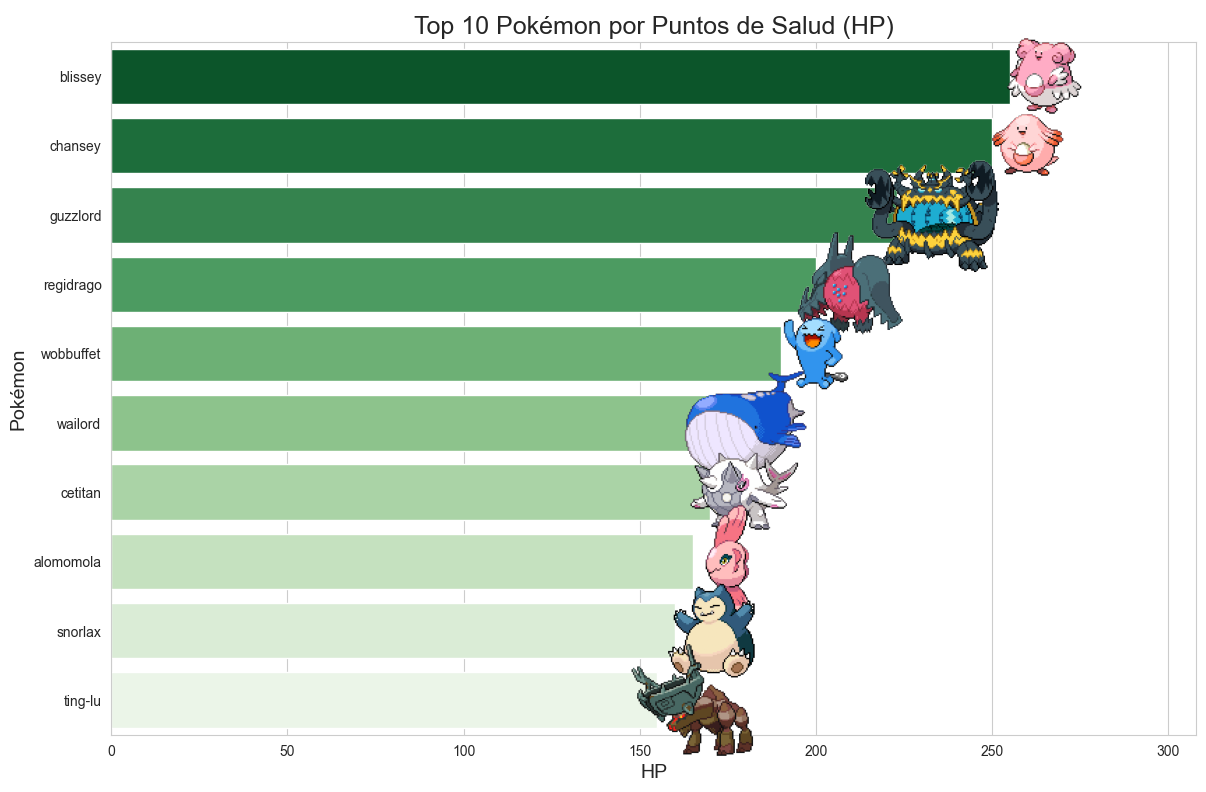

In [ ]:
# --- Top 10 Pokémon más Saludables (HP) ---
top_10_hp = df.sort_values('hp', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(14, 9))
sns.barplot(x='hp', y='name', data=top_10_hp, palette='Greens_r')

# --- 3. Añadir los Sprites a cada Barra ---
for i, (index, row) in enumerate(top_10_hp.iterrows()):
    try:
        sprite_path = f"../images/sprites/{row['name'].lower()}.png"
        
        # Leemos la imagen
        img = mpimg.imread(sprite_path)

        # Creamos el objeto de imagen que Matplotlib puede usar
        # El zoom ajusta el tamaño del sprite en el gráfico
        imagebox = OffsetImage(img, zoom=0.5)
        imagebox.image.axes = ax

        # Creamos la caja de anotación para posicionar la imagen
        # Coordenadas: (x, y) donde 'x' es el valor de HP y 'y' es la posición de la barra (0, 1, 2...)
        # El segundo argumento es la posición en píxeles donde se ancla la imagen, (0,0) es el centro.
        ab = AnnotationBbox(imagebox, 
                            (row['hp'], i), 
                            xybox=(25, 0), # Desplaza la imagen 25 píxeles a la derecha del final de la barra
                            frameon=False,
                            xycoords='data',
                            boxcoords="offset points",
                            pad=0)
        
        # Añadimos la imagen al gráfico
        ax.add_artist(ab)
        
    except FileNotFoundError:
        # Si un sprite no se encuentra, simplemente imprimimos un aviso y continuamos
        print(f"Advertencia: No se encontró el sprite para {row['name']}")


plt.title('Top 10 Pokémon por Puntos de Salud (HP)', fontsize=18)
plt.xlabel('HP', fontsize=14)
plt.ylabel('Pokémon', fontsize=14)

# Ajustar los límites del eje X para dar espacio a los sprites
ax.set_xlim(right=ax.get_xlim()[1] * 1.15) 

#plt.tight_layout()
plt.show()

/var/folders/m1/0y71t71124d1b252nm7stg280000gn/T/ipykernel_77308/3873258787.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='defense', y='name', data=top_10_defense, palette='Blues_r')


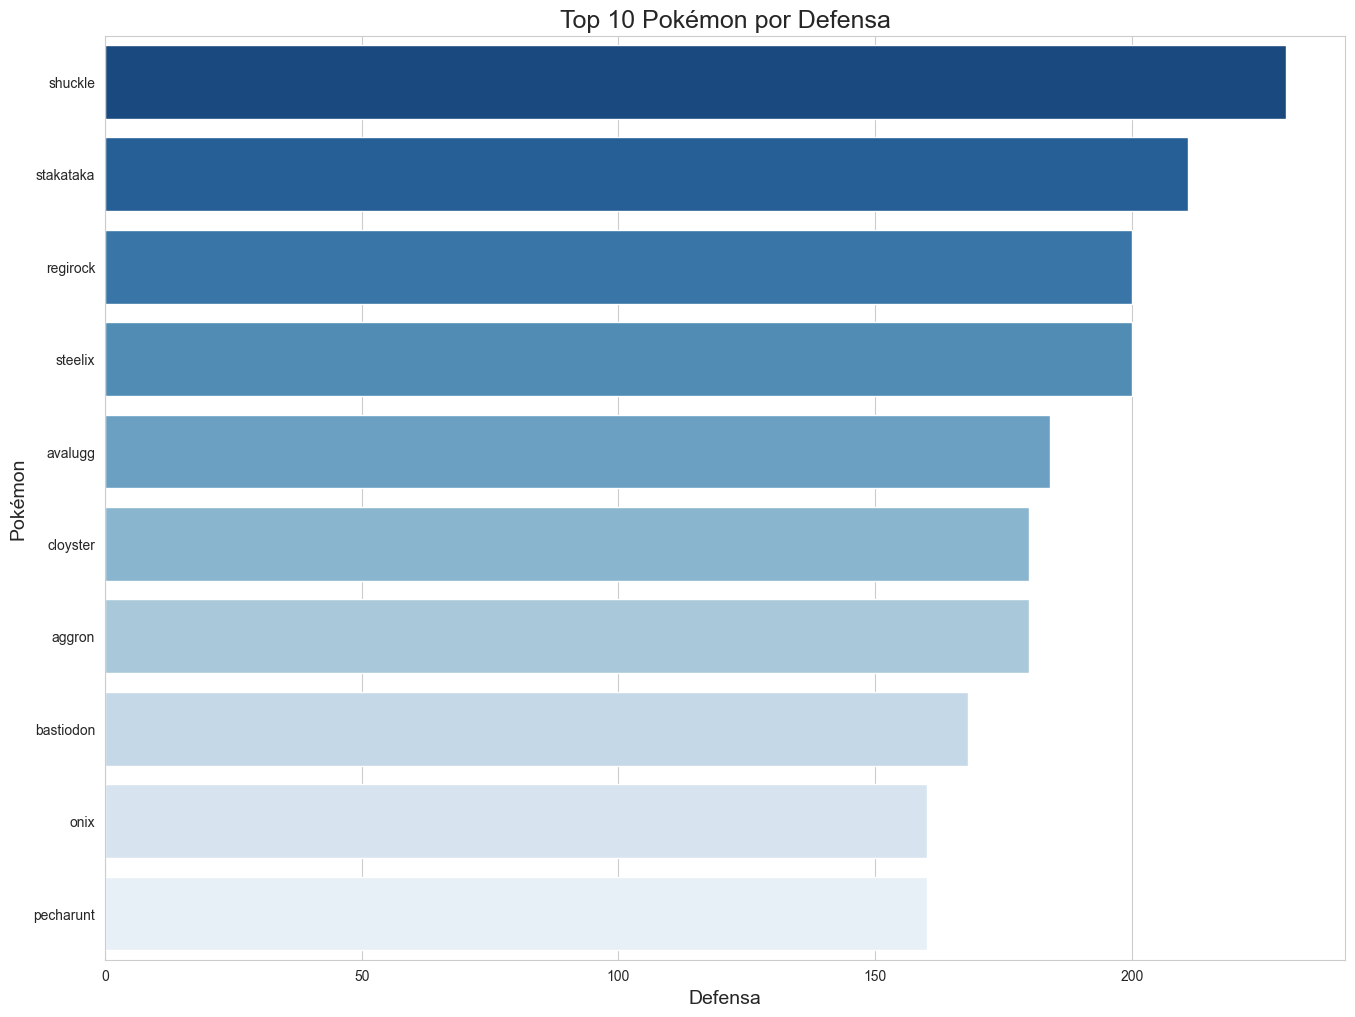

/var/folders/m1/0y71t71124d1b252nm7stg280000gn/T/ipykernel_77308/3873258787.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='attack', y='name', data=top_10_attack, palette='Reds_r')


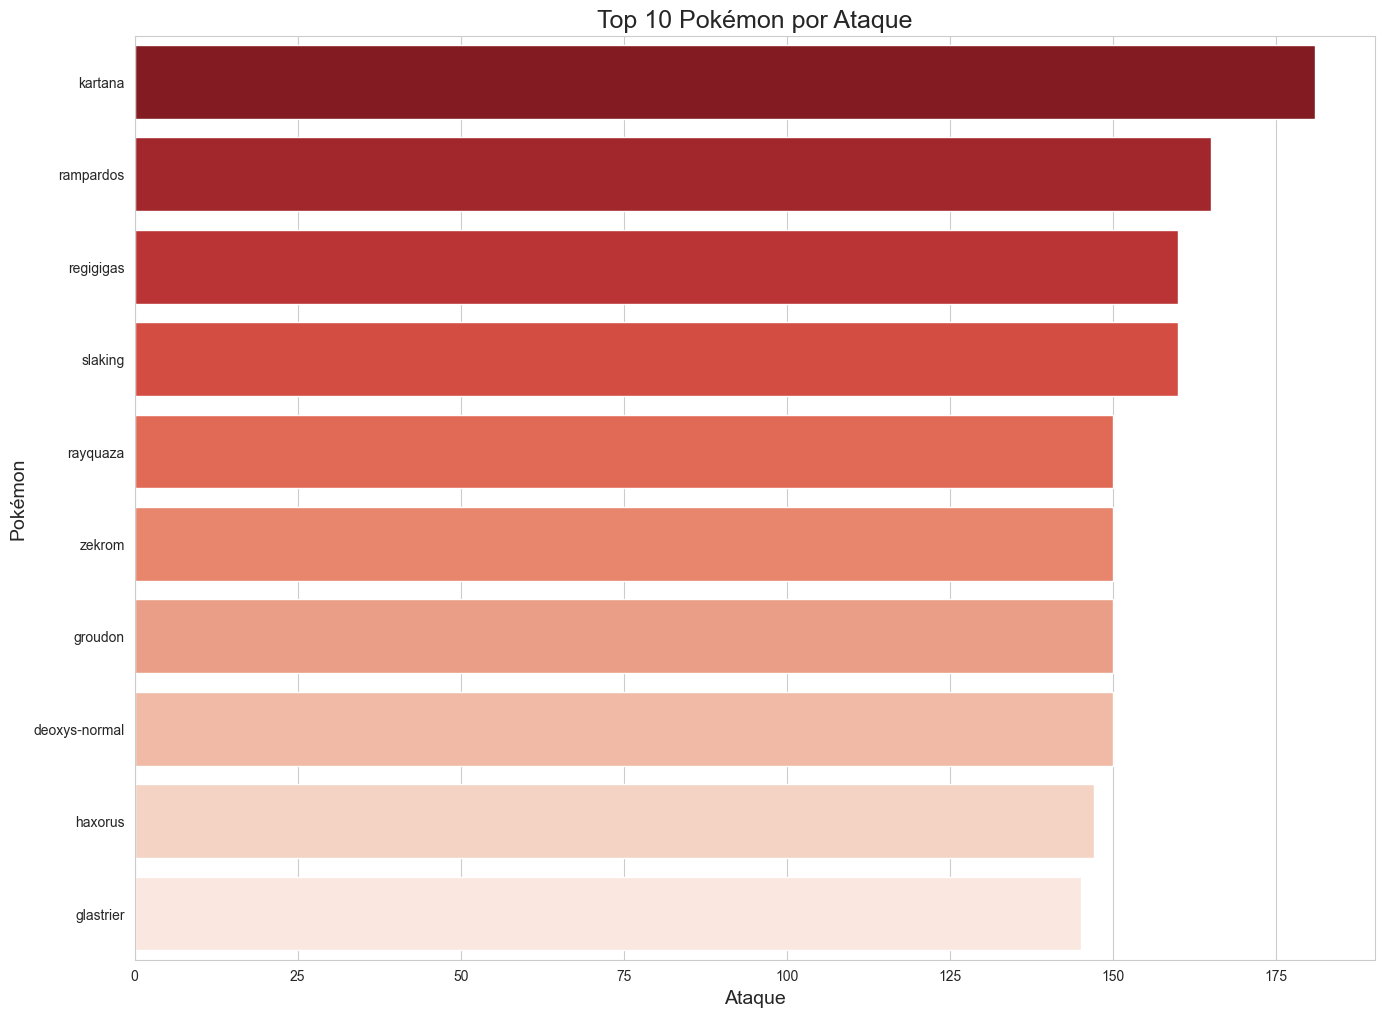

In [32]:
# --- Top 10 Pokémon más Defensivos ---
top_10_defense = df.sort_values('defense', ascending=False).head(10)
sns.barplot(x='defense', y='name', data=top_10_defense, palette='Blues_r')
plt.title('Top 10 Pokémon por Defensa', fontsize=18)
plt.xlabel('Defensa', fontsize=14)
plt.ylabel('Pokémon', fontsize=14)
plt.show()

# --- Top 10 Pokémon más Fuertes (Ataque) ---
top_10_attack = df.sort_values('attack', ascending=False).head(10)
sns.barplot(x='attack', y='name', data=top_10_attack, palette='Reds_r')
plt.title('Top 10 Pokémon por Ataque', fontsize=18)
plt.xlabel('Ataque', fontsize=14)
plt.ylabel('Pokémon', fontsize=14)
plt.show()

## 2. Análisis de Correlaciones

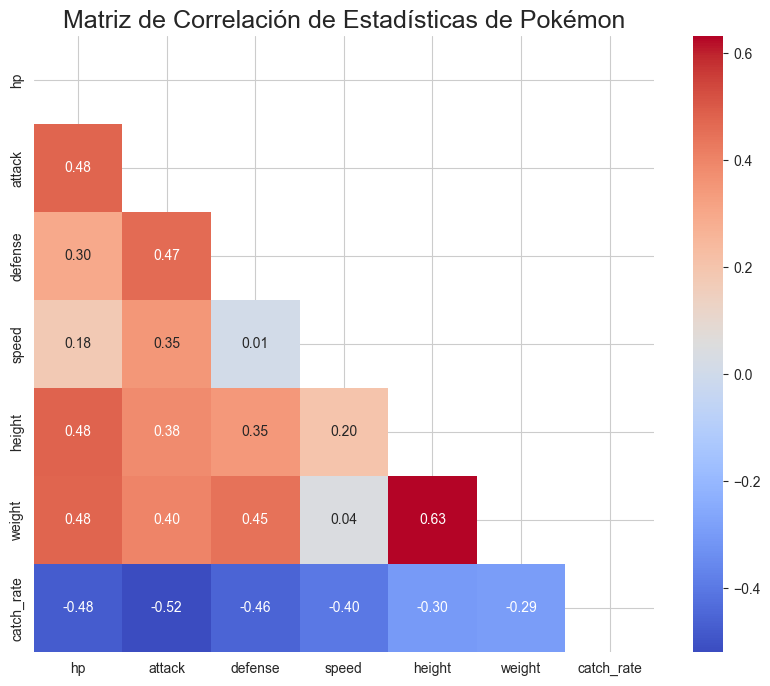

In [23]:
# --- 1. Seleccionar solo las Columnas Numéricas ---
# Seleccionamos las variables que tienen sentido para un análisis de correlación.
numeric_cols = ['hp', 'attack', 'defense', 'speed', 'height', 'weight', 'catch_rate']
df_numeric = df[numeric_cols]

# --- 2. Calcular la Matriz de Correlación ---
# El método .corr() de pandas calcula la correlación de Pearson por defecto.
corr_matrix = df_numeric.corr()

# --- 3. Crear el Heatmap ---
plt.figure(figsize=(10, 8))

# Usamos una máscara para ocultar la mitad superior del heatmap, ya que es redundante (espejada).
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, 
            annot=True,     # Muestra los valores numéricos en cada celda
            cmap='coolwarm',# Paleta de colores (frío para negativo, cálido para positivo)
            mask=mask,      # Aplica la máscara
            fmt=".2f")      # Formatea los números a 2 decimales

plt.title('Matriz de Correlación de Estadísticas de Pokémon', fontsize=18)
plt.show()

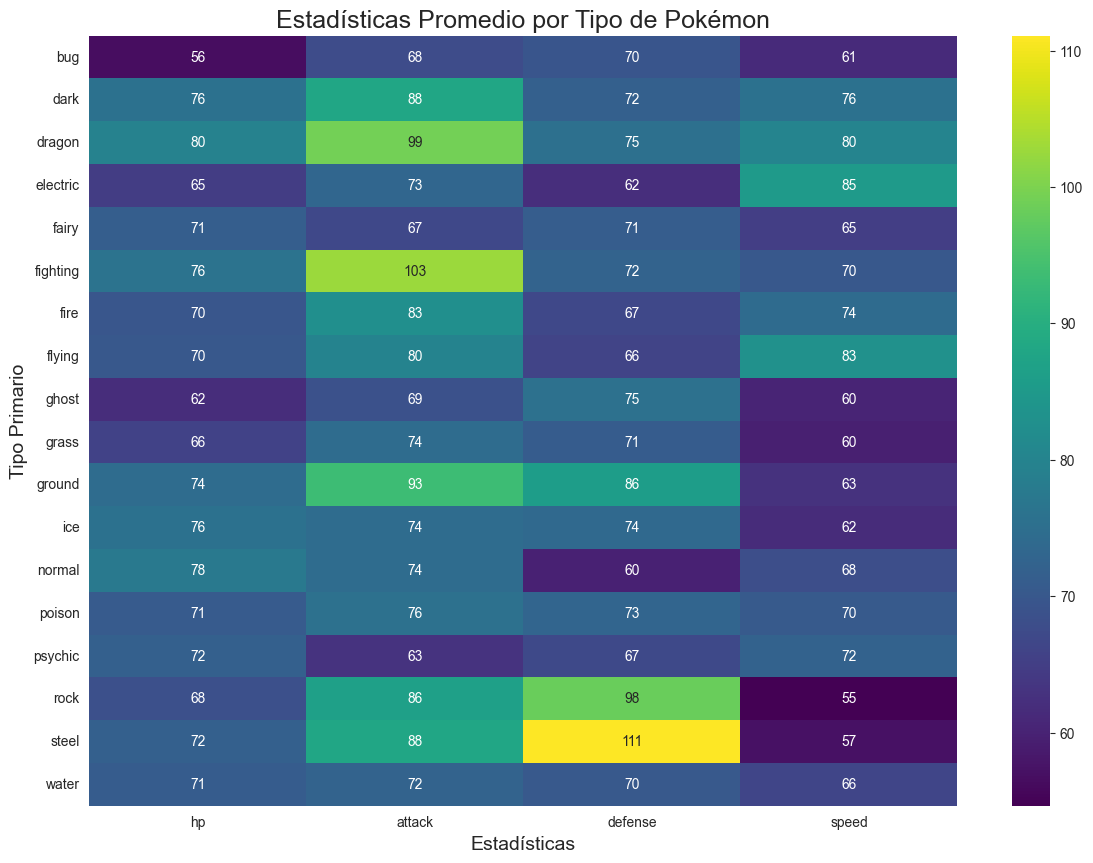

In [ ]:
# --- 1. Definir las Columnas de Estadísticas de Interés ---
stats_cols = ['hp', 'attack', 'defense', 'speed']

# --- 2. Agrupar por Tipo y Calcular la Media ---
# Usamos groupby() para agrupar todas las filas por su 'type1'.
# Luego, seleccionamos las columnas de estadísticas y calculamos su media para cada grupo.
mean_stats_by_type = df.groupby('type1')[stats_cols].mean()

# --- 3. Crear el Heatmap de Medias ---
plt.figure(figsize=(14, 10))

sns.heatmap(mean_stats_by_type,
            annot=True,       # Muestra los valores numéricos
            cmap='viridis',   # Usamos una paleta de colores secuencial (de bajo a alto)
            fmt=".0f")        # Formateamos los números como enteros para mayor claridad

plt.title('Estadísticas Promedio por Tipo de Pokémon', fontsize=18)
plt.xlabel('Estadísticas Promedio', fontsize=14)
plt.ylabel('Tipo Primario', fontsize=14)
plt.show()